In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
my_data=pd.read_csv('train.csv')
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
my_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


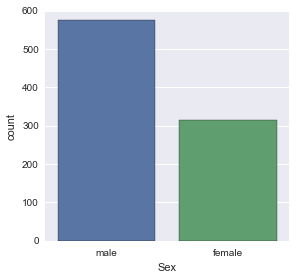

In [6]:
sns.factorplot('Sex',data=my_data,kind="count")

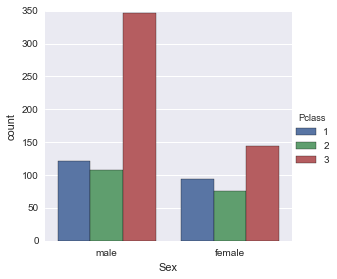

In [7]:
sns.factorplot('Sex',data=my_data,hue='Pclass',kind="count")

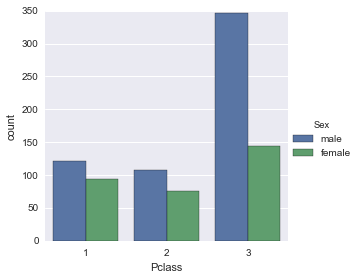

In [8]:
sns.factorplot('Pclass',data=my_data,hue='Sex',kind="count")

In [9]:
def ischild(age,age_limit=16):
    if age<=age_limit:
        return True
    else:
        return False

In [10]:
my_data['Is_child']=my_data['Age'].apply(ischild)
my_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_child
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,False
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,True


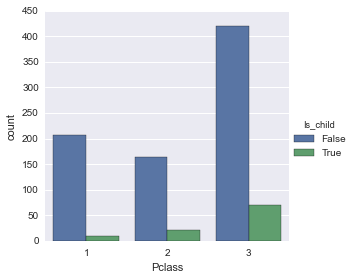

In [11]:
sns.factorplot('Pclass',data=my_data,hue='Is_child',kind="count")

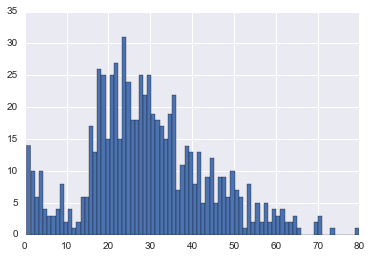

In [17]:
my_data.Age.hist(bins=80)

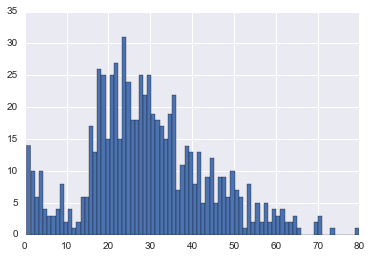

In [15]:
_=plt.hist(my_data.Age[~np.isnan(my_data.Age)],bins=80)

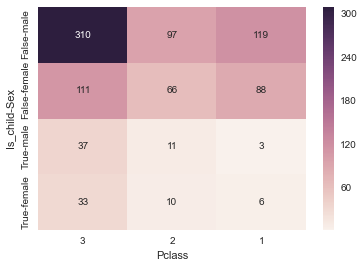

In [172]:
aux_my_data=my_data[['Sex','Is_child','Pclass']].copy()
aux_my_data['Num']=1
aux_my_data=pd.pivot_table(aux_my_data,index=['Is_child','Sex'],columns='Pclass',values='Num',aggfunc=np.sum)
aux_my_data.sort_index(level=['Is_child','Sex'],ascending=[True,False],inplace=True)
aux_my_data.sort_index(axis=1,ascending=False,inplace=True)
sns.heatmap(aux_my_data,annot=True,fmt='d')

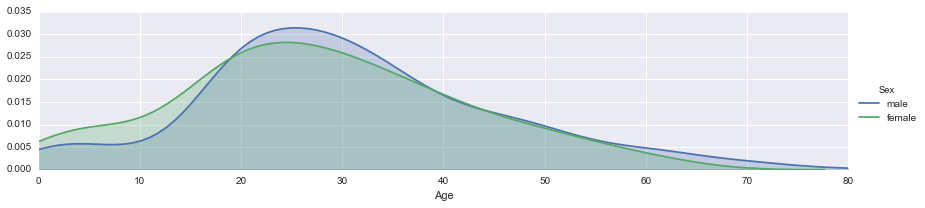

In [159]:
fig=sns.FacetGrid(my_data,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,my_data['Age'].max()))
fig.add_legend()

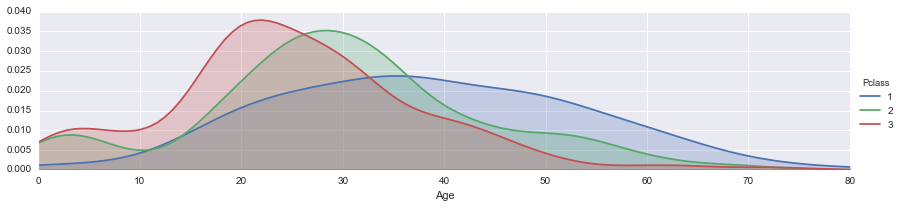

In [158]:
fig=sns.FacetGrid(my_data,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,my_data['Age'].max()))
fig.add_legend()

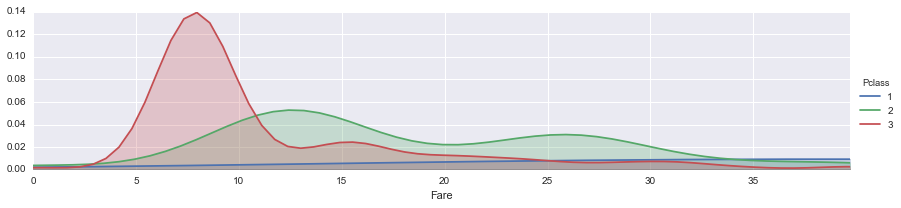

In [228]:
fig=sns.FacetGrid(my_data,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Fare',shade=True)
fig.set(xlim=(0,my_data['Fare'].quantile(0.8)))
fig.add_legend()

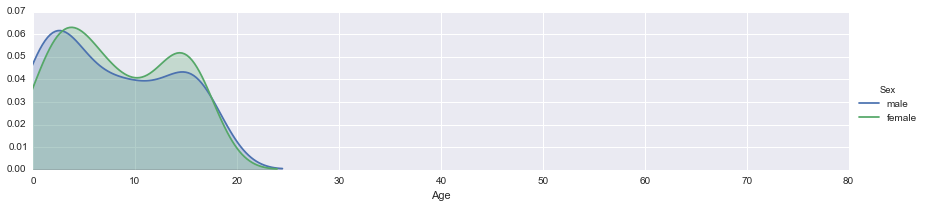

In [161]:
fig=sns.FacetGrid(my_data[my_data['Is_child']==True],hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,my_data['Age'].max()))
fig.add_legend()

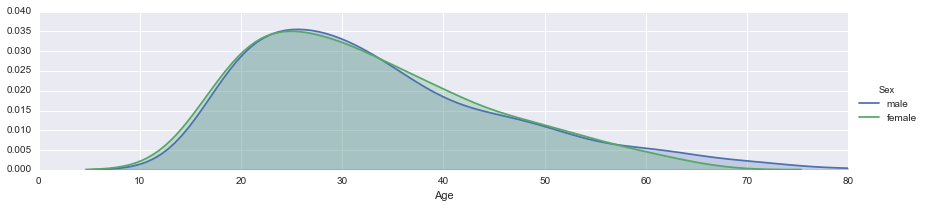

In [165]:
fig=sns.FacetGrid(my_data[my_data['Is_child']==False],hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,my_data['Age'].max()))
fig.add_legend()

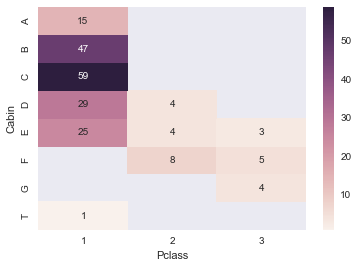

In [186]:
aux_my_data=my_data[['Pclass','Cabin']].copy().dropna()
aux_my_data['Num']=1
aux_my_data['Cabin']=aux_my_data['Cabin'].apply(lambda x: x[0])
aux_my_data=pd.pivot_table(aux_my_data,index=['Cabin'],columns='Pclass',values='Num',aggfunc=np.sum)
sns.heatmap(aux_my_data,annot=True)

In [205]:
my_data['Deck']=my_data['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else x)
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_child,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,False,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,False,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False,NaN


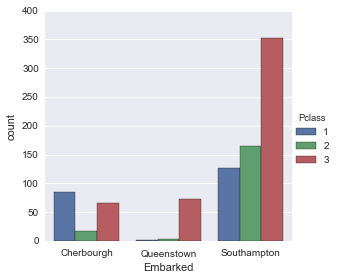

In [212]:
sns.factorplot('Embarked',data=my_data.replace({'Embarked':{'C':'Cherbourgh','Q':'Queenstown','S':'Southampton'}}),
               hue='Pclass',order=['Cherbourgh','Queenstown','Southampton'],kind="count")

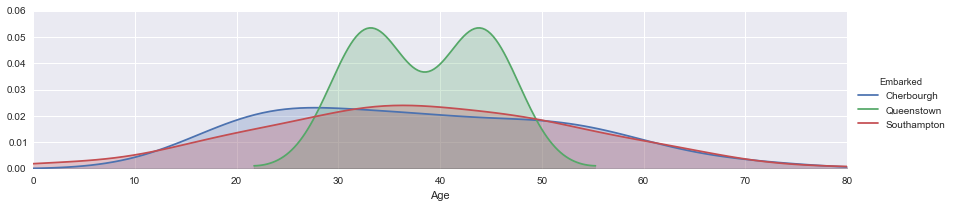

In [223]:
fig=sns.FacetGrid(my_data[my_data['Pclass']==1].replace({'Embarked':{'C':'Cherbourgh',
                                                                     'Q':'Queenstown',
                                                                     'S':'Southampton'}}),
                  hue='Embarked',hue_order=['Cherbourgh','Queenstown','Southampton'],aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,my_data['Age'].max()))
fig.add_legend()

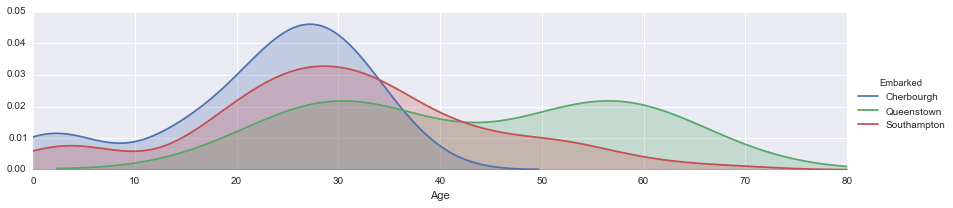

In [224]:
fig=sns.FacetGrid(my_data[my_data['Pclass']==2].replace({'Embarked':{'C':'Cherbourgh',
                                                                     'Q':'Queenstown',
                                                                     'S':'Southampton'}}),
                  hue='Embarked',hue_order=['Cherbourgh','Queenstown','Southampton'],aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,my_data['Age'].max()))
fig.add_legend()

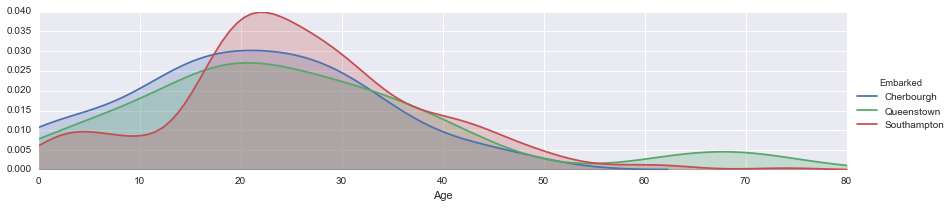

In [225]:
fig=sns.FacetGrid(my_data[my_data['Pclass']==3].replace({'Embarked':{'C':'Cherbourgh',
                                                                     'Q':'Queenstown',
                                                                     'S':'Southampton'}}),
                  hue='Embarked',hue_order=['Cherbourgh','Queenstown','Southampton'],aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,my_data['Age'].max()))
fig.add_legend()

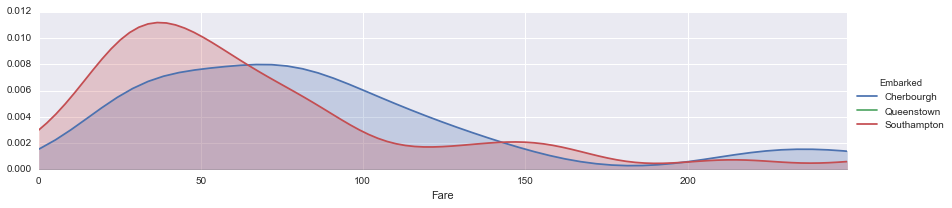

In [236]:
fig=sns.FacetGrid(my_data[my_data['Pclass']==1].replace({'Embarked':{'C':'Cherbourgh',
                                                                     'Q':'Queenstown',
                                                                     'S':'Southampton'}}),
                  hue='Embarked',hue_order=['Cherbourgh','Queenstown','Southampton'],aspect=4)
fig.map(sns.kdeplot,'Fare',shade=True)
fig.set(xlim=(0,my_data['Fare'].quantile(0.99)))
fig.add_legend()

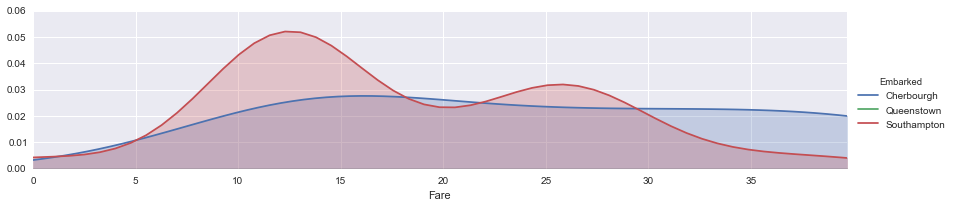

In [238]:
fig=sns.FacetGrid(my_data[my_data['Pclass']==2].replace({'Embarked':{'C':'Cherbourgh',
                                                                     'Q':'Queenstown',
                                                                     'S':'Southampton'}}),
                  hue='Embarked',hue_order=['Cherbourgh','Queenstown','Southampton'],aspect=4)
fig.map(sns.kdeplot,'Fare',shade=True)
fig.set(xlim=(0,my_data['Fare'].quantile(0.8)))
fig.add_legend()

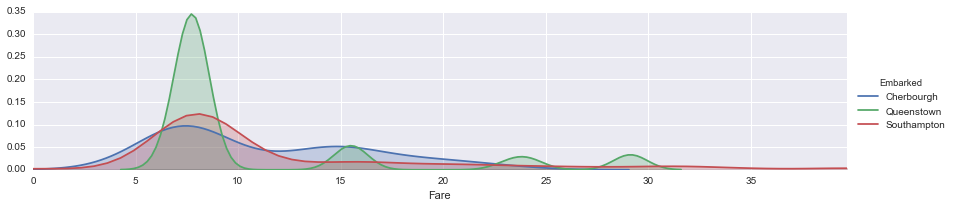

In [239]:
fig=sns.FacetGrid(my_data[my_data['Pclass']==3].replace({'Embarked':{'C':'Cherbourgh',
                                                                     'Q':'Queenstown',
                                                                     'S':'Southampton'}}),
                  hue='Embarked',hue_order=['Cherbourgh','Queenstown','Southampton'],aspect=4)
fig.map(sns.kdeplot,'Fare',shade=True)
fig.set(xlim=(0,my_data['Fare'].quantile(0.8)))
fig.add_legend()

In [248]:
my_data['WithFamily']=my_data.apply(lambda row: 'With' if row['SibSp'] | row['Parch'] else 'Without',axis=1)
my_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_child,Deck,WithFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False,NaN,With
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,False,C,With
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False,NaN,Without
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,False,C,With
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False,NaN,Without


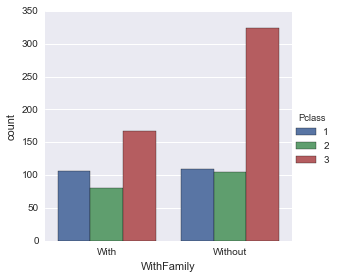

In [249]:
sns.factorplot('WithFamily',data=my_data,hue='Pclass',kind="count")

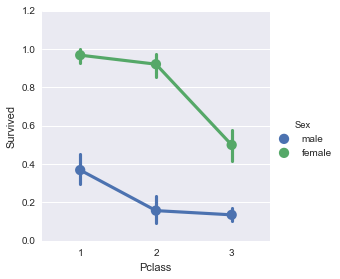

In [255]:
sns.factorplot('Pclass','Survived',hue='Sex',data=my_data)

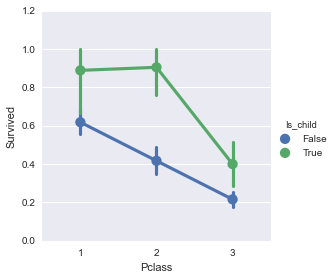

In [256]:
sns.factorplot('Pclass','Survived',hue='Is_child',data=my_data)

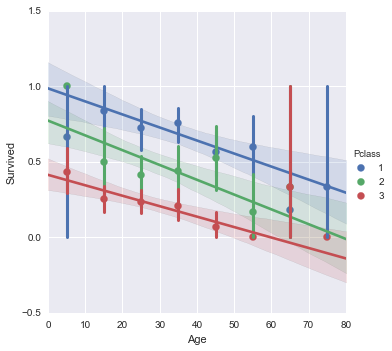

In [275]:
fig=sns.lmplot('Age','Survived',hue='Pclass',data=my_data,x_bins=range(5,85,10))
_=fig.ax.set_xlim(0,80)

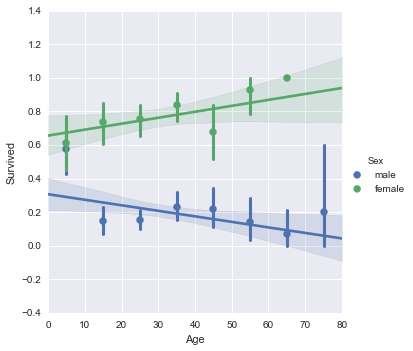

In [276]:
fig=sns.lmplot('Age','Survived',hue='Sex',data=my_data,x_bins=range(5,85,10))
_=fig.ax.set_xlim(0,80)

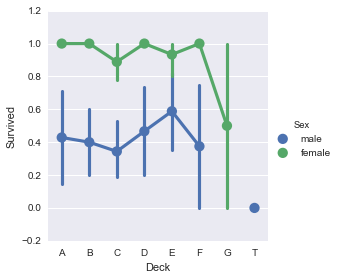

In [280]:
sns.factorplot('Deck','Survived',hue='Sex',order=['A','B','C','D','E','F','G','T'],data=my_data)

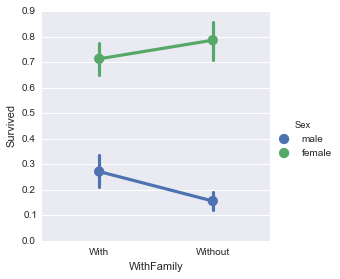

In [281]:
sns.factorplot('WithFamily','Survived',hue='Sex',data=my_data)